In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from faceid_dataset import FaceIDDataset
from torch.utils.data import DataLoader
from squeezenet import faceid

In [2]:
def get_stat(faceid_model, x0, x1):
    cosine = torch.nn.CosineSimilarity()
    embed_x0 = faceid_model(x0)
    embed_x1 = faceid_model(x1)
    return round(cosine(embed_x0, embed_x1).item(), 4)    

In [3]:
def to_numpy(x):
    mean = torch.tensor([0.5255, 0.5095, 0.4861, 0.7114]).view(1, 4, 1, 1)
    std = torch.tensor([0.2075, 0.1959, 0.1678, 0.2599]).view(1, 4, 1, 1)
    # Scale back to range [0, 1]
    x = (x * std) + mean
    x = x.squeeze(0).permute(1, 2, 0)
    return x.numpy()

In [4]:
def plot(faceid_model, x0, x1):
    
    cosine = get_stat(faceid_model, x0, x1)
    
    x0 = to_numpy(x0)
    x1 = to_numpy(x1)
    
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(10, 10)
    
    axs[0, 0].imshow(x0[:,:,:3])
    axs[0, 0].set_title('X0 - RGB')
    axs[1, 0].imshow(x0[:,:,3], cmap='RdYlBu')
    axs[1, 0].set_title('X0 - Depth')
    
    axs[0, 1].imshow(x1[:,:,:3])
    axs[0, 1].set_title('X1 - RGB \n Cosine to X0: ' + str(cosine), color='b')
    axs[1, 1].imshow(x1[:,:,3], cmap='RdYlBu')
    axs[1, 1].set_title('X1 - Depth')
        
    for i in range(2):
        for j in range(2):
            axs[i,j].axis('off') 
    
    plt.show()

In [5]:
faceid_model = faceid(pretrained=True)
faceid_model = faceid_model.eval()

In [6]:
data_dir = '/raid/data/pytorch_dataset/faceid/'
dataset = FaceIDDataset(data_dir, train=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

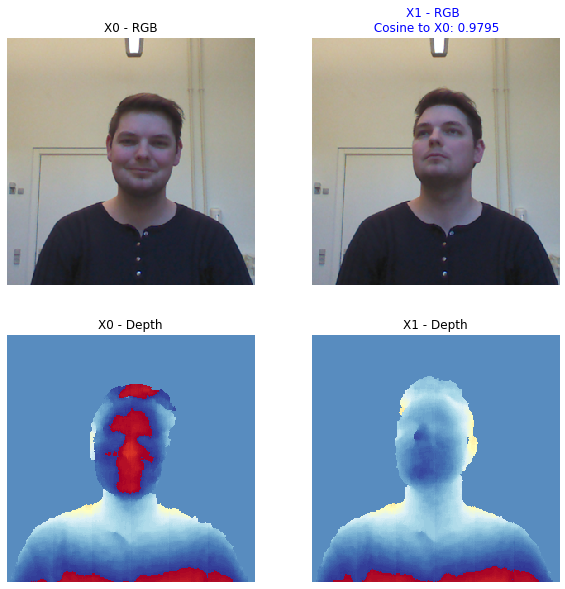

In [7]:
x0, x1, _ = next(iter(dataloader))
plot(faceid_model, x0, x1)

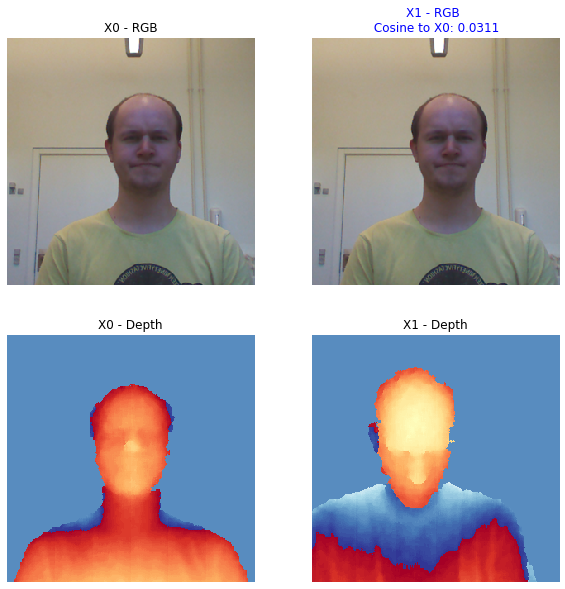

In [8]:
x0, x1, _ = next(iter(dataloader))
plot(faceid_model, x0, x1)

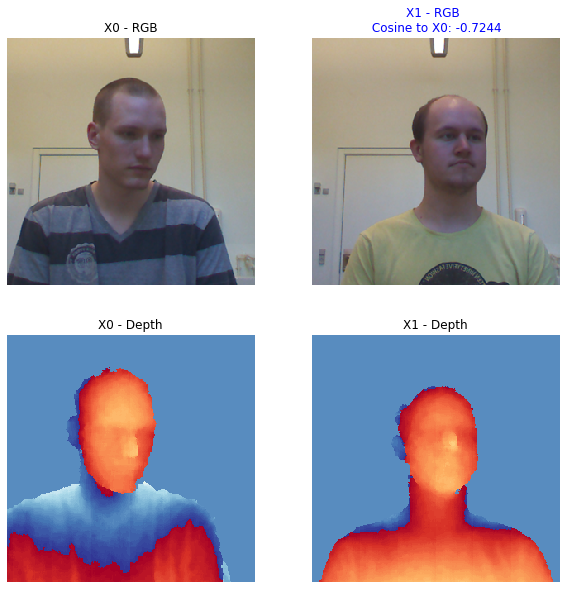

In [9]:
x0, x1, _ = next(iter(dataloader))
plot(faceid_model, x0, x1)